<a href="https://colab.research.google.com/github/khaychuk/amliNet/blob/master/fin_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

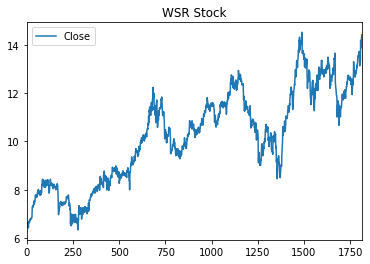

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

def stock_graph(symbol,title):
    df = pd.read_csv(".../content/fin/{}.us.txt".format(symbol))
    df[['Close']].plot()
    plt.title(title)
    plt.show()

stock_graph("wsr","WSR Stock")

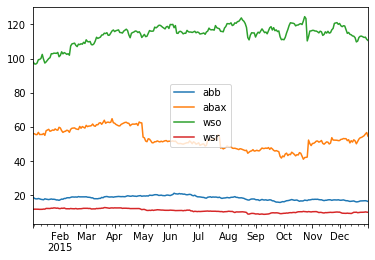

In [20]:
# Get stock data for multiple stocks for given symbols and dates and graph it
def stocks_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    for symbol in symbols:
        df_temp = pd.read_csv("/content/fin/{}.us.txt".format(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Close': symbol})
        df = df.join(df_temp)
    return df

dates = pd.date_range('2015-01-02','2015-12-31',freq='B')
symbols = ['abb','abax','wso','wsr']

df = stocks_data(symbols, dates)
df.fillna(method='pad')
#print(df)
df.interpolate().plot()
plt.show()

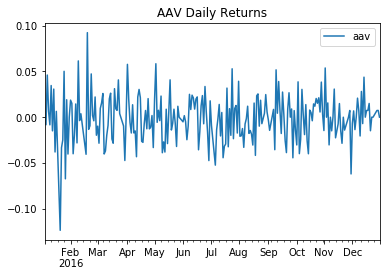

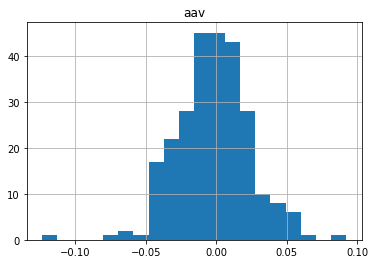

In [21]:
# Daily Returns for a symbol with date range
def daily_return(df):
    dr = df.copy()
    dr = dr[:-1].values / dr[1:] - 1
    return dr

dates = pd.date_range('2016-01-01','2016-12-31',freq='B')
symbols = ['aav']
df = stocks_data(symbols, dates)
dr = daily_return(df)
dr = dr.interpolate()
dr.interpolate().plot()
plt.title('AAV Daily Returns')
plt.show()
dr.hist(bins=20)
plt.show()

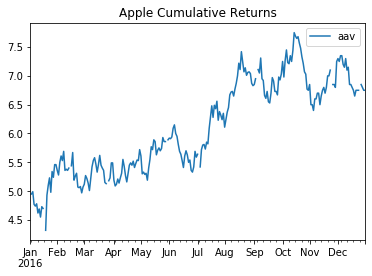

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7bb4f1c18>]],
      dtype=object)

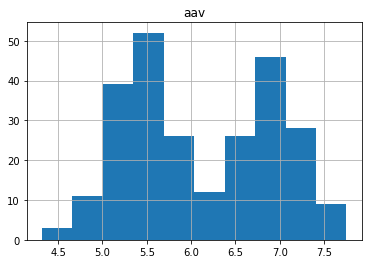

In [22]:
#Cumulative Returns
def cum_return(df):
    dr = df.copy()
    dr.cumsum()
    return dr

dates = pd.date_range('2016-01-01','2016-12-31',freq='B')
symbols = ['aav']
df = stocks_data(symbols, dates)
dr = cum_return(df)
dr.plot()
plt.title('Apple Cumulative Returns')
plt.show()
dr.hist()

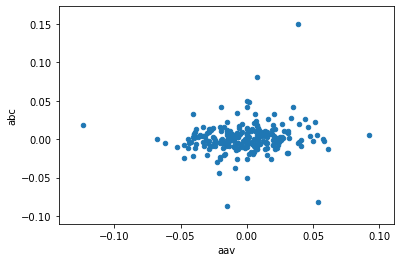

In [23]:
# Scatterplot between two stocks
dates = pd.date_range('2016-01-01','2016-12-31',freq='B')
symbols = ['aav','abc']
df = stocks_data(symbols, dates)
dr = daily_return(df)
dr.plot(kind='scatter',x='aav', y='abc')
plt.show()

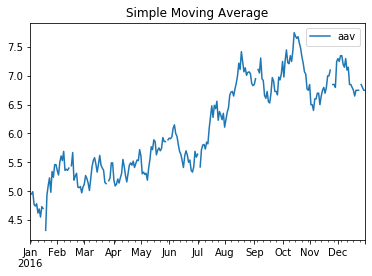

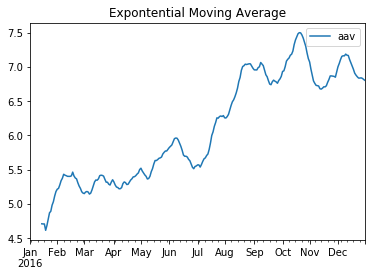

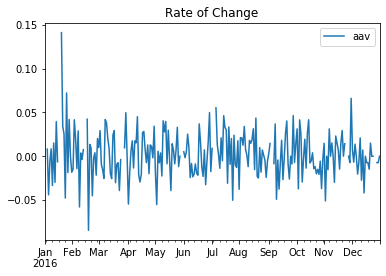

In [24]:
# Technical Indicators
# Bollinger Bands
def get_bbands(df, ndays):
    db = df.copy()
    dm = df.rolling(ndays).mean()
    ds = df.rolling(ndays).std()
    db['upperBB'] = dm + 2 * ds
    db['lowerBB'] = dm - 2 * ds
    return db

# Simple Moving Average
def get_SMA(df, ndays):
    dm = df.copy()
    dm.rolling(ndays).mean()
    return dm

# Expontential Moving Average
def get_EMA(df, ndays):
    dm = df.ewm( span = ndays, min_periods = ndays - 1).mean()
    return dm

# Rate of Change
def get_ROC(df, ndays):
    dn = df.diff(ndays)
    dd = df.shift(ndays)
    dr = dn/dd
    return dr

dates = pd.date_range('2016-01-01','2016-12-31',freq='B')
symbols = ['aav']
df = stocks_data(symbols, dates)
dm = get_SMA(df, 10)
dm.plot()
plt.title('Simple Moving Average')
plt.show()
dm = get_EMA(df, 10)
dm.plot()
plt.title('Expontential Moving Average')
plt.show()

dr = get_ROC(df, 1)
dr.plot()
plt.title('Rate of Change')
plt.show()